### Phase Time series

- This notebook is used to display mannuall-selected phase time series. 
- We will interpolate the time series and consider the frequency content.
- Brunt–Väisälä frequency
$$N = \sqrt{\frac{-g}{\rho} \left( \frac{\partial\rho}{\partial z} \right)}$$

In [1]:
import h5py, scipy, datetime, csv, sys, os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
sys.path.append("../utils/")
import DASfuncs
from util import *

In [2]:
# data directory
data_directory = os.path.join('..', 'data', 'phase_time_series') 

In [3]:
# list files in increaseing sorted order
sorted_files = sort_file(data_directory) 

In [4]:
sorted_files

['positions_9_10.csv', 'positions_10_11.csv']

In [5]:
# concatenate all sorted files
concat_df = data_concat(sorted_files)

In [6]:
concat_df

,phase (rad)
datetime,
2023-08-09 20:24:58,2878.313592
2023-08-09 20:26:47,2880.467448
2023-08-09 20:27:37,2881.903353
2023-08-09 20:28:37,2884.057209
2023-08-09 20:29:56,2887.168335
...,...
2023-08-10 23:44:14,2886.327971
2023-08-10 23:48:29,2879.846074
2023-08-10 23:49:05,2873.364177


In [7]:
prep_fft = prep_data(concat_df)

In [8]:
prep_fft

,phase (rad)
datetime,
2023-08-09 20:24:00,2878.313592
2023-08-09 20:25:00,2879.390520
2023-08-09 20:26:00,2880.467448
2023-08-09 20:27:00,2881.903353
2023-08-09 20:28:00,2884.057209
...,...
2023-08-10 23:53:00,2877.627046
2023-08-10 23:54:00,2878.692764
2023-08-10 23:55:00,2879.758481


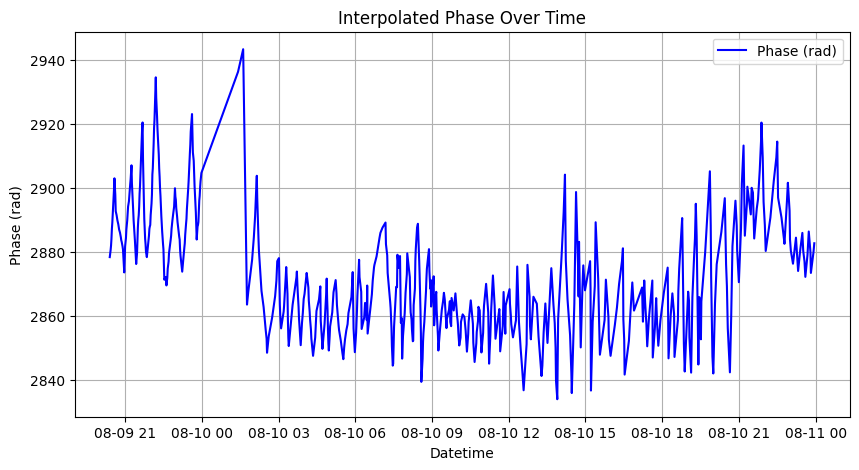

In [9]:
# display the phase time series 
plt.figure(figsize=(10, 5))
plt.plot(prep_fft.index, prep_fft['phase (rad)'], label='Phase (rad)', color='blue')

plt.xlabel('Datetime')
plt.ylabel('Phase (rad)')
plt.title('Interpolated Phase Over Time')
plt.legend()
plt.grid()
plt.show()

In [10]:
# FFT
positive_frequencies, positive_magnitude = compute_fft(prep_fft)

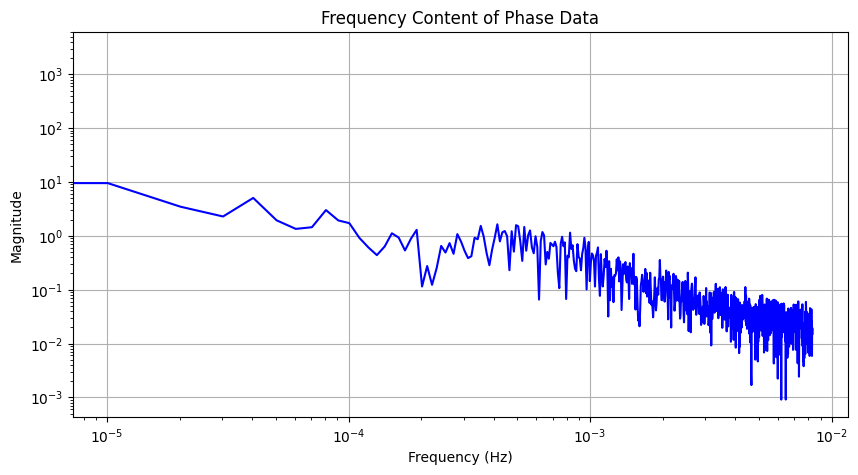

In [11]:
# plot the frequency content
plt.figure(figsize=(10, 5))
plt.plot(positive_frequencies, positive_magnitude, color='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Content of Phase Data')
plt.grid()
#plt.xlim(0, max(positive_frequencies))
plt.show()

In [15]:
# get the peaks from the FFT
top_peaks, peak_values = peak_iden(positive_frequencies)

Indices of local maxima: []
Values of local maxima: []


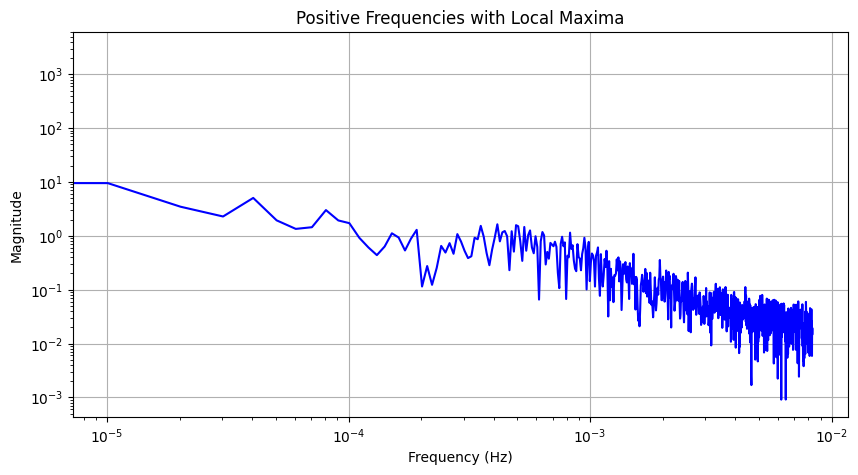

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(positive_frequencies, positive_magnitude, color='blue', label='positive frequencies')
plt.plot(top_peaks, peak_values, 'or', markersize=8, label='peaks')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Positive Frequencies with Local Maxima')
plt.grid()
#plt.xlim(0, max(positive_frequencies))
plt.show()

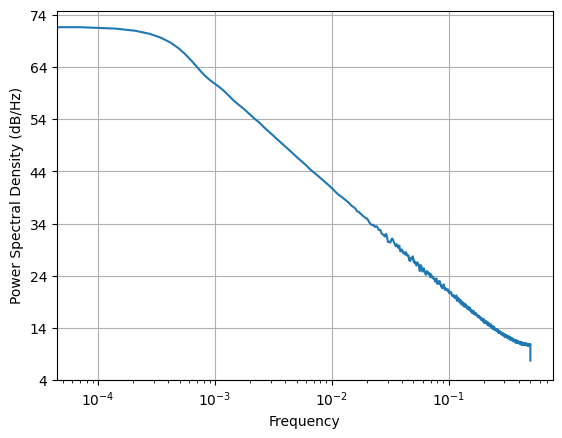

In [12]:
plt.psd(prep_fft['phase (rad)'], Fs=1, NFFT=3600*4)
plt.xscale('log')

/var/folders/pf/3_nyp_6j7059y5qxp6tr1_vm0000gn/T/ipykernel_93813/819768312.py:1: UserWarning: Only one segment is calculated since parameter NFFT (=10800) >= signal length (=1654).
  Pxx, freq, bins,_ = plt.specgram(prep_fft['phase (rad)'], NFFT=3600*3, Fs=1)


(0.00018518518518518518, 0.5)

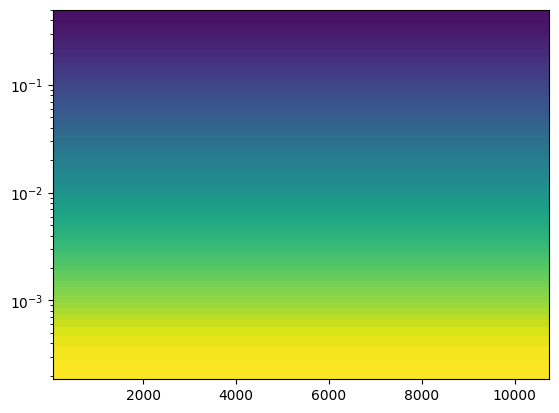

In [13]:
Pxx, freq, bins,_ = plt.specgram(prep_fft['phase (rad)'], NFFT=3600*3, Fs=1)
plt.yscale('log')
plt.ylim(1/3600/3*2,0.5)